In [57]:
import keras
import tensorflow as tf
import random
import shutil
import os
import re
keras.__version__

'2.6.0'

## Selecting species subset

In [2]:
dir_train_mini = "/courses/EDS232/inaturalist-2021/train_mini"

In [3]:
dirs_spp = os.listdir(dir_train_mini)
n_spp = len(dirs_spp)
n_spp

10000

In [4]:
seed_value = 71993

In [5]:
random.seed(seed_value)
i10 = random.sample(range(1, n_spp), 10)
i10

[6265, 8377, 9422, 2010, 7951, 3269, 4966, 3475, 9868, 6903]

In [6]:
for i in range(0, len(i10)):
    print(os.path.basename(dirs_spp[i10[i]]))

02163_Animalia_Arthropoda_Insecta_Lepidoptera_Saturniidae_Hyalophora_columbia
09827_Plantae_Tracheophyta_Pinopsida_Pinales_Pinaceae_Pinus_monophylla
00004_Animalia_Arthropoda_Arachnida_Araneae_Agelenidae_Eratigena_duellica
03353_Animalia_Chordata_Aves_Charadriiformes_Charadriidae_Charadrius_leschenaultii
00283_Animalia_Arthropoda_Insecta_Coleoptera_Chrysomelidae_Disonycha_glabrata
09526_Plantae_Tracheophyta_Magnoliopsida_Santalales_Santalaceae_Phoradendron_leucarpum
06969_Plantae_Tracheophyta_Magnoliopsida_Asterales_Asteraceae_Senecio_ampullaceus
04410_Animalia_Chordata_Aves_Pelecaniformes_Threskiornithidae_Theristicus_caudatus
03042_Animalia_Chordata_Amphibia_Anura_Ranidae_Rana_cascadae
04087_Animalia_Chordata_Aves_Passeriformes_Parulidae_Setophaga_townsendi


In [7]:
i2 = i10[0:2]

In [8]:
for i in range(0, len(i2)):
    print(os.path.basename(dirs_spp[i2[i]]))

02163_Animalia_Arthropoda_Insecta_Lepidoptera_Saturniidae_Hyalophora_columbia
09827_Plantae_Tracheophyta_Pinopsida_Pinales_Pinaceae_Pinus_monophylla


## Building file structure

In [10]:
original_dataset_dir = dir_train_mini

# The directory where we stored our smaller dataset
base_dir = "/Users/petermenzies/eds232-ml/inat-neural-nets/inat_subset"
os.mkdir(base_dir)

In [141]:
spp_names = []

for i in range(0, len(i10)):
    full_name = os.path.basename(dirs_spp[i10[i]]).lower()
    name_split = full_name.split('_')
    name = name_split[-2] + '_' + name_split[-1]
    spp_names.append(name)

In [172]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_dir_names = []
test_dir_names = []
validation_dir_names = []

for i in range(0, len(i10)):
    locals()['train_' + spp_names[i] + '_dir'] = os.path.join(train_dir, spp_names[i])
    locals()['validation_' + spp_names[i] + '_dir'] = os.path.join(validation_dir, spp_names[i])
    locals()['test_' + spp_names[i] + '_dir'] = os.path.join(test_dir, spp_names[i])
    
    train_dir_names.extend(['train_' + spp_names[i] + '_dir'])
    validation_dir_names.extend(['validation_' + spp_names[i] + '_dir'])
    test_dir_names.extend(['test_' + spp_names[i] + '_dir'])

In [192]:
# Creating directories

if not os.path.exists('inat_subset/train'):

    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)

    for i in train_dir_names:
        os.mkdir(locals()[i])

    for i in validation_dir_names:
        os.mkdir(locals()[i])

    for i in test_dir_names:
        os.mkdir(locals()[i])

## Copying over image files into new structure

In [193]:
# Copying subset of images from source directory to new structured directories

if len(os.listdir('inat_subset/train/charadrius_leschenaultii')) == 0:
    
    # Copying training images
    for i in range(0, len(i10)):
        path = os.path.join(original_dataset_dir, dirs_spp[i10[i]])
        fnames = os.listdir(path)[0:30]

        for fname in fnames:
            src = os.path.join(original_dataset_dir, path, fname)
            dst = os.path.join(locals()[train_dir_names[i]], fname)
            shutil.copyfile(src, dst)

    # Copying validation images
    for i in range(0, len(i10)):
        path = os.path.join(original_dataset_dir, dirs_spp[i10[i]])
        fnames = os.listdir(path)[30:40]

        for fname in fnames:
            src = os.path.join(original_dataset_dir, path, fname)
            dst = os.path.join(locals()[validation_dir_names[i]], fname)
            shutil.copyfile(src, dst)

    # Copying test images
    for i in range(0, len(i10)):
        path = os.path.join(original_dataset_dir, dirs_spp[i10[i]])
        fnames = os.listdir(path)[40:50]

        for fname in fnames:
            src = os.path.join(original_dataset_dir, path, fname)
            dst = os.path.join(locals()[test_dir_names[i]], fname)
            shutil.copyfile(src, dst)

## Artificial neural net for binary species classification

#### Building network

In [272]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [273]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 150, 150, 32)      128       
_________________________________________________________________
dense_48 (Dense)             (None, 150, 150, 16)      528       
_________________________________________________________________
flatten_7 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 360001    
Total params: 360,657
Trainable params: 360,657
Non-trainable params: 0
_________________________________________________________________


#### Data pre-processing

In [222]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'inat_subset/binary/train'
validation_dir = 'inat_subset/binary/validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [241]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


#### Training model

In [275]:
history = model.fit(
      train_generator,
      steps_per_epoch=4,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=1)

Epoch 1/10
4/4 [==============================] - 0s 110ms/step - loss: 0.0889 - accuracy: 0.9750 - val_loss: 1.0169 - val_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 0s 98ms/step - loss: 0.8052 - accuracy: 0.7500 - val_loss: 0.6940 - val_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 98ms/step - loss: 0.1730 - accuracy: 0.9000 - val_loss: 1.4741 - val_accuracy: 0.4000
Epoch 4/10
4/4 [==============================] - 0s 89ms/step - loss: 0.5912 - accuracy: 0.7500 - val_loss: 0.6171 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 97ms/step - loss: 0.0839 - accuracy: 1.0000 - val_loss: 0.9355 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 95ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.7140 - val_accuracy: 0.4000
Epoch 7/10
4/4 [==============================] - 0s 93ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 1.3200 - val_accuracy: 0.4000
Epoch 8/10
4/4 [==========

In [267]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

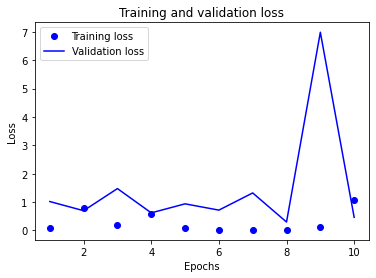

In [276]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Convolutional neural net for binary species classification

In [277]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [278]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])